In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [81]:
with open('C:\\Users\\0903o\\OneDrive\\mobile_health\\lib\\pythonVis\\sleepDatatest.json', 'r') as file:
    data = pd.read_json(file)

In [82]:
data

,version,sembast,key,store,value
0,1.0,1.0,NaN,NaN,NaN
1,NaN,NaN,1.0,sleep_data_store,"{'start': '2026-01-20T15:39:16.355522', 'end':..."
2,NaN,NaN,2.0,sleep_data_store,"{'start': '2026-01-20T15:47:51.869648', 'end':..."
3,NaN,NaN,3.0,sleep_data_store,"{'start': '2026-01-20T15:52:46.588123', 'end':..."
4,NaN,NaN,4.0,sleep_data_store,"{'start': '2026-01-20T15:54:48.794049', 'end':..."
5,NaN,NaN,5.0,sleep_data_store,"{'start': '2026-01-20T15:57:36.383971', 'end':..."
6,NaN,NaN,6.0,sleep_data_store,"{'start': '2026-01-20T16:19:40.311582', 'end':..."
7,NaN,NaN,7.0,sleep_data_store,"{'start': '2026-01-20T16:26:45.477679', 'end':..."
8,NaN,NaN,8.0,sleep_data_store,"{'start': '2026-01-20T16:27:10.017657', 'end':..."
9,NaN,NaN,9.0,sleep_data_store,"{'start': '2026-01-20T16:28:27.389921', 'end':..."


In [ ]:
key = 13  # index for the specific sleep session to analyse

hr = data['value'][key]['hr']
rr = data['value'][key]['rr']
lux = data['value'][key]['lux']
movementEvents = data['value'][key]['movementEvents']
starttime = data['value'][key]['start']
endtime = data['value'][key]['end']
durationMs = data['value'][key]['durationMs']
hrhz = 125 #hz, hr sample rate
movhz = 13 #hz, movement sample rate

hrdt = durationMs / len(hr)  # ms, time delta between heart rate samples
movdt = durationMs / len(rr)  # ms, time delta between movement samples
lxdt = len(lux)  # ms, time delta between lux samples

hrdts = hrdt / 1000  # s, time delta between heart rate samples
movdts = movdt / 1000  # s, time delta between movement samples


hrdtm = hrdt / 60000  # min, time delta between heart rate samples
movdtm = movdt / 60000  # min, time delta between movement samples

durationS = durationMs / 1000  # s, total duration in seconds
durationM = durationMs / 60000  # min, total duration in minutes

hrt = np.arange(0, durationM, hrdtm) # min time array for heart rate
movt = np.arange(0, durationM, movdtm)# min time array for movement
lxt = np.arange(0, len(lux), 1) # index array for lux





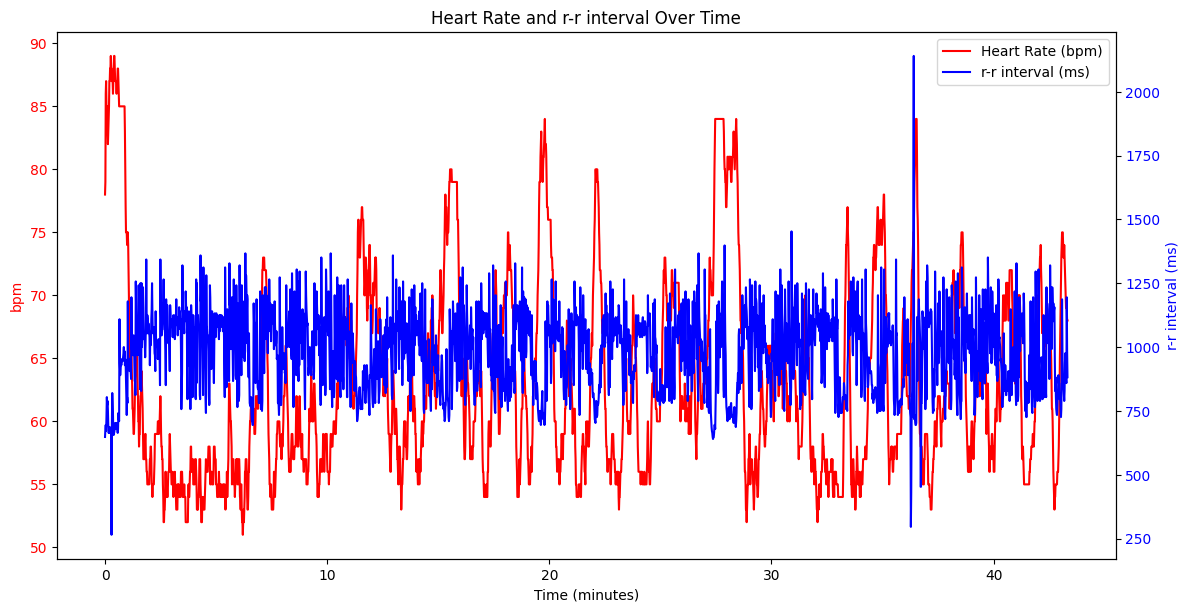

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(hrt, hr, color='red', label='Heart Rate (bpm)')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('bpm', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(hrt, rr, color='blue', label='r-r interval (ms)')
ax2.set_ylabel('r-r interval (ms)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

fig.tight_layout()
plt.title('Heart Rate and r-r interval Over Time')
plt.show()

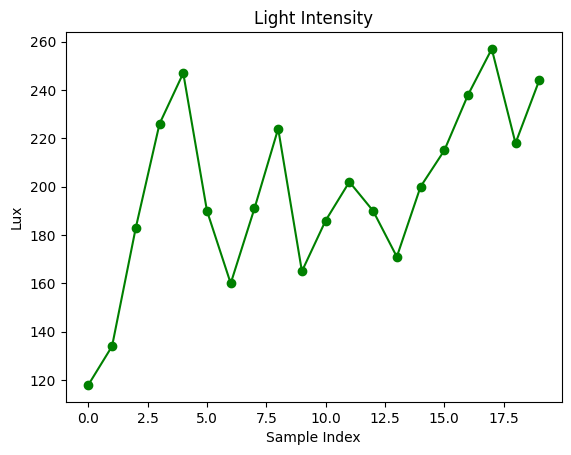

In [86]:
plt.plot(lxt, lux, color='green', marker='o')
plt.xlabel('Sample Index')
plt.ylabel('Lux')
plt.title('Light Intensity')
plt.show()

In [89]:
movementEvents

15

In [91]:
#hrv calculation
def calculate_hrv(rr_intervals):
    rr_diff = np.diff(rr_intervals)
    squared_diffs = rr_diff ** 2
    mean_squared_diffs = np.mean(squared_diffs)
    rmssd = np.sqrt(mean_squared_diffs)
    return rmssd
hrv = calculate_hrv(rr)
hrv

138.2764986500515